<a href="https://colab.research.google.com/github/mwinzie/Autolib2-Project/blob/master/Moringa_Data_Science_Core_W3_Independent_Project_Agnes_Mwinzi_DataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research Problem
The objective of this project is to investigate a claim about the number of blue cars used in Autolib electric car-sharing service company.

In [0]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st

# Loading the Dataset

### Loading the data dictionary

In [16]:
#loading the data dictionary for the Autolib dataset
autodict = pd.read_csv('columnsexplanation.csv', header = 1, compression = None)

#previewing the autolib data dictionary
autodict

,Postal code,postal code of the area (in Paris)
0,date,date of the row aggregation
1,n_daily_data_points,number of daily data poinst that were availabl...
2,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
3,day_type,weekday or weekend
4,BlueCars_taken_sum,Number of bluecars taken that date in that area
5,BlueCars_returned_sum,Number of bluecars returned that date in that ...
6,Utilib_taken_sum,Number of Utilib taken that date in that area
7,Utilib_returned_sum,Number of Utilib returned that date in that area
8,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area
9,Utilib_14_returned_sum,Number of Utilib 1.4 returned that date in tha...


### Loading the Autolib Dataset

In [10]:
#loading the autolib dataset from the URL and creating a dataframe called auto
auto = pd.read_csv('http://bit.ly/DSCoreAutolibDataset')

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


# Reading the Dataset

In [19]:
#previewing the number of rows and columns that are in the dataset
print((auto.shape[0]), 'rows')
print(auto.shape[1], 'columns')

16085 rows
13 columns


In [17]:
#previewing the first five records in the dataset to see what the data set contains
auto.head(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [24]:
#previewing the bottom five records in the dataset
auto.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [22]:
auto.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

# Tidying the Dataset
While tidying the dataset, I shall check for missing data, check for validity by identifying irrelevant data that may not be needed, check for any syntax errors, outliers and also check for data completeness and uniformity.

In [26]:
#checking the column names
auto.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [27]:
#converting all the column names to lower case and replacing any spaces ' ', with '_'
auto.columns = auto.columns.str.strip().str.replace(' ','_').str.lower()
#previewing the column names to ensure the changes have been effected
auto.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [129]:
#converting the date column to time data type
pd.to_datetime(auto['date'])

0       2018-01-01
1       2018-01-02
2       2018-01-03
3       2018-01-04
4       2018-01-05
5       2018-01-06
6       2018-01-07
7       2018-01-08
8       2018-01-09
9       2018-01-10
10      2018-01-11
11      2018-01-12
12      2018-01-13
13      2018-01-14
14      2018-01-15
15      2018-01-16
16      2018-01-17
17      2018-01-18
18      2018-01-19
19      2018-01-20
20      2018-01-21
21      2018-01-22
22      2018-01-23
23      2018-01-24
24      2018-01-25
25      2018-01-26
26      2018-01-27
27      2018-01-28
28      2018-01-29
29      2018-01-30
           ...    
16055   2018-05-21
16056   2018-05-22
16057   2018-05-23
16058   2018-05-24
16059   2018-05-25
16060   2018-05-26
16061   2018-05-27
16062   2018-05-28
16063   2018-05-29
16064   2018-05-30
16065   2018-05-31
16066   2018-06-01
16067   2018-06-02
16068   2018-06-03
16069   2018-06-04
16070   2018-06-05
16071   2018-06-06
16072   2018-06-07
16073   2018-06-08
16074   2018-06-09
16075   2018-06-10
16076   2018

In [29]:
# Checking duplicate rows except first occurrence based on all columns in the data set
duplicateRows = auto[auto.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(auto)

#most of the duplicate values are postal codes but each represent a different value in terms of cars and dates.
#therefore none of the duplicate values will be deleted since they will be important for the model.

Duplicate Rows except first occurrence based on all columns are :
       postal_code       date  ...  slots_freed_sum  slots_taken_sum
0            75001   1/1/2018  ...               22               20
1            75001   1/2/2018  ...               23               22
2            75001   1/3/2018  ...               27               27
3            75001   1/4/2018  ...               25               21
4            75001   1/5/2018  ...               18               20
5            75001   1/6/2018  ...               38               35
6            75001   1/7/2018  ...               34               34
7            75001   1/8/2018  ...               14               15
8            75001   1/9/2018  ...               15               15
9            75001  1/10/2018  ...               23               22
10           75001  1/11/2018  ...               22               22
11           75001  1/12/2018  ...               11               13
12           75001  1/13/2018  ...   

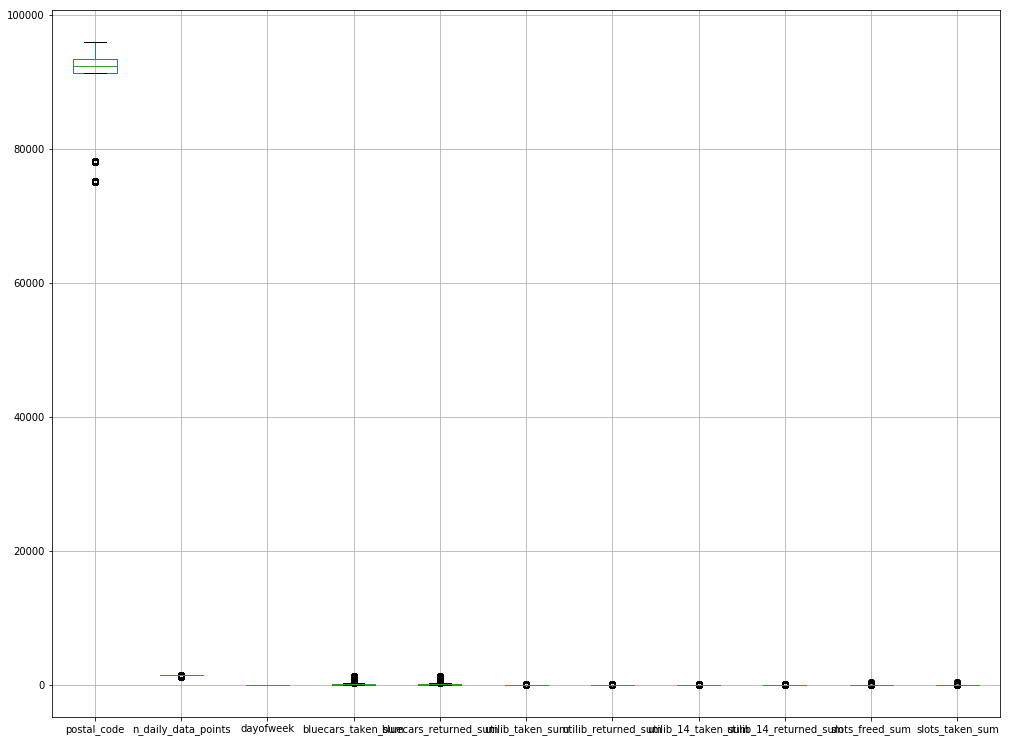

In [33]:
#checking the dataset for any outliers
#plots all the outliers for all numeric values columns
auto.boxplot(figsize = (17,13))

#most of the columns seem to have outliers but i shall keep them as they may be crucial to the model

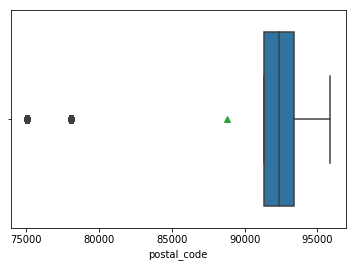

In [36]:
#boxplot for the postal code column
sns.boxplot(auto['postal_code'], showmeans = True)

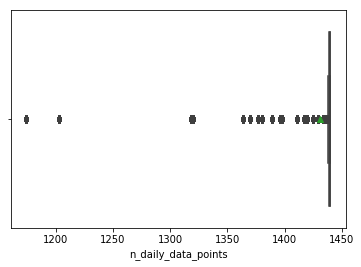

In [40]:
#boxplot for the daily data points column
sns.boxplot(auto['n_daily_data_points'], showmeans = True)
#the data points column seems to have many outliers but i shall keep them for my model

In [42]:
auto.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

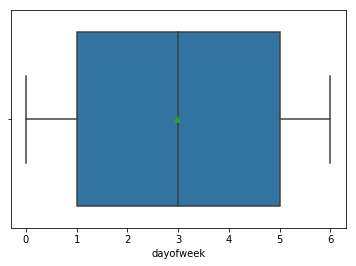

In [43]:
sns.boxplot(auto['dayofweek'], showmeans = True)
#the dayofweek column does not present any outliers

In [38]:
#checking the data set for any null values
auto.isnull().sum()
#the data set does not contain any null values

postal_code               0
date                      0
n_daily_data_points       0
dayofweek                 0
day_type                  0
bluecars_taken_sum        0
bluecars_returned_sum     0
utilib_taken_sum          0
utilib_returned_sum       0
utilib_14_taken_sum       0
utilib_14_returned_sum    0
slots_freed_sum           0
slots_taken_sum           0
dtype: int64

In [39]:
#iterating through all columns for unique values in the dataset
for i in auto.columns:
  #to print a line in between the columns
  print('\n')
  print(auto[i].unique())



[75001 75002 75003 75004 75005 75006 75007 75008 75009 75010 75011 75012
 75013 75014 75015 75016 75017 75018 75019 75020 75112 75116 78000 78140
 78150 91330 91370 91400 92000 92100 92110 92120 92130 92140 92150 92160
 92170 92190 92200 92210 92220 92230 92240 92250 92260 92270 92290 92300
 92310 92320 92330 92340 92350 92360 92370 92380 92390 92400 92410 92420
 92500 92600 92700 92800 93100 93110 93130 93150 93170 93200 93230 93260
 93300 93310 93350 93360 93370 93390 93400 93440 93500 93600 93700 93800
 94000 94100 94110 94120 94130 94140 94150 94160 94220 94230 94300 94340
 94410 94450 94500 94700 94800 95100 95870 95880]


['1/1/2018' '1/2/2018' '1/3/2018' '1/4/2018' '1/5/2018' '1/6/2018'
 '1/7/2018' '1/8/2018' '1/9/2018' '1/10/2018' '1/11/2018' '1/12/2018'
 '1/13/2018' '1/14/2018' '1/15/2018' '1/16/2018' '1/17/2018' '1/18/2018'
 '1/19/2018' '1/20/2018' '1/21/2018' '1/22/2018' '1/23/2018' '1/24/2018'
 '1/25/2018' '1/26/2018' '1/27/2018' '1/28/2018' '1/29/2018' '1/30/2018'
 '1/31

# Univariate Analysis

In [59]:
#measures of central tendency for the different variables in the data
#means of various variables
auto.mean()
#this shows the avarage of the variables in the datset

postal_code               88791.293876
n_daily_data_points        1431.330619
dayofweek                     2.969599
bluecars_taken_sum          125.926951
bluecars_returned_sum       125.912714
utilib_taken_sum              3.698290
utilib_returned_sum           3.699099
utilib_14_taken_sum           8.600560
utilib_14_returned_sum        8.599192
slots_freed_sum              22.629033
slots_taken_sum              22.629282
dtype: float64

In [60]:
#median of various variables
#returns the middle value of the variable
auto.median()


postal_code               92340.0
n_daily_data_points        1440.0
dayofweek                     3.0
bluecars_taken_sum           46.0
bluecars_returned_sum        46.0
utilib_taken_sum              1.0
utilib_returned_sum           1.0
utilib_14_taken_sum           3.0
utilib_14_returned_sum        3.0
slots_freed_sum               0.0
slots_taken_sum               0.0
dtype: float64

In [63]:
#the function shows the measures of central tendencies and location for the dataset
auto.describe()

,postal_code,n_daily_data_points,dayofweek,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


## Frequency Tables

In [88]:
#Frequency tables of the dataset using cross tab between country and has a bank account column

frequency = pd.crosstab(index=auto["bluecars_taken_sum"], columns=[auto["dayofweek"]],margins = True)
frequency

#shows the total number of bluecars taken for each day of the week

dayofweek,0,1,2,3,4,5,6,All
bluecars_taken_sum,,,,,,,,
0,8,15,6,9,6,15,6,65
1,16,35,20,16,11,27,13,138
2,18,32,18,26,16,27,12,149
3,31,39,23,25,28,20,12,178
4,34,36,23,19,18,26,16,172
5,36,36,33,30,20,18,17,190
6,30,30,20,25,24,25,17,171
7,41,36,35,33,24,23,22,214
8,38,32,35,26,25,19,20,195


Monday is the has the highest turn over of the blue cars with 2374 blue cars taken while Saturday has the lowest with 2267 blue cars

In [90]:
frequency = pd.crosstab(index=auto["bluecars_returned_sum"], columns=[auto["dayofweek"]],margins = True)
frequency


dayofweek,0,1,2,3,4,5,6,All
bluecars_returned_sum,,,,,,,,
0,4,8,1,9,2,5,2,31
1,25,28,21,17,5,21,2,119
2,19,36,18,15,21,17,14,140
3,24,33,20,28,30,15,20,170
4,23,29,25,22,18,26,21,164
5,38,30,35,20,24,29,17,193
6,36,33,25,22,30,28,22,196
7,27,35,21,26,19,27,37,192
8,31,35,38,19,28,24,20,195


The number of blue cars taken during the week are similar to the number of blue cars returned during the week.

In [91]:
auto.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [93]:
#Frequency tables of the dataset using cross tab between country and has a bank account column

frequency = pd.crosstab(index=auto["day_type"], columns=[auto["n_daily_data_points"]],margins = True)
frequency


n_daily_data_points,1174,1203,1318,1320,1364,1370,1377,1380,1389,1396,1398,1411,1417,1420,1425,1429,1434,1435,1436,1437,1438,1439,1440,All
day_type,,,,,,,,,,,,,,,,,,,,,,,,
weekday,104,103,0,103,103,94,102,0,103,0,104,104,206,103,207,104,207,104,104,308,516,2269,6496,11544
weekend,0,0,103,0,0,0,0,103,0,98,0,0,0,0,0,0,0,0,0,103,207,310,3617,4541
All,104,103,103,103,103,94,102,103,103,98,104,104,206,103,207,104,207,104,104,411,723,2579,10113,16085


The weekday has many daily data points of 11544 comapred to the weekend which has 4541 data points. Most traffic is during the week days.

## Bar Charts and Histograms

In [94]:
auto.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

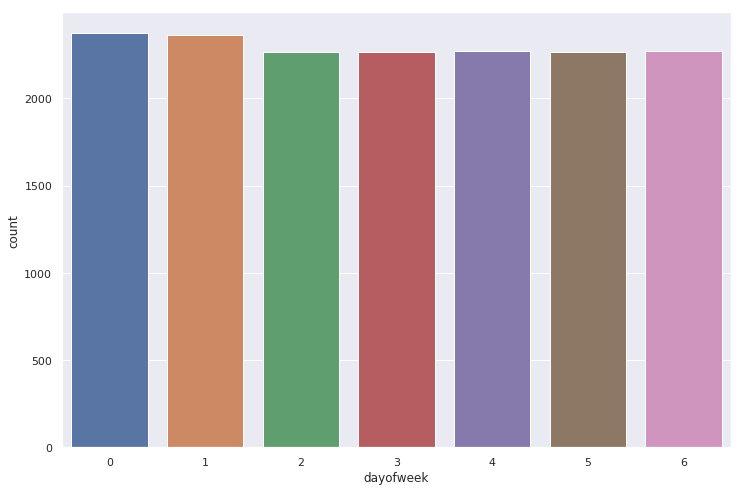

In [106]:
#plotting postal code bar graph
sns.set(rc={'figure.figsize':(12,8)})
sns.countplot(x='dayofweek',data=auto)

#monday and tuesday seem to have more traffic compared to the rest of the week

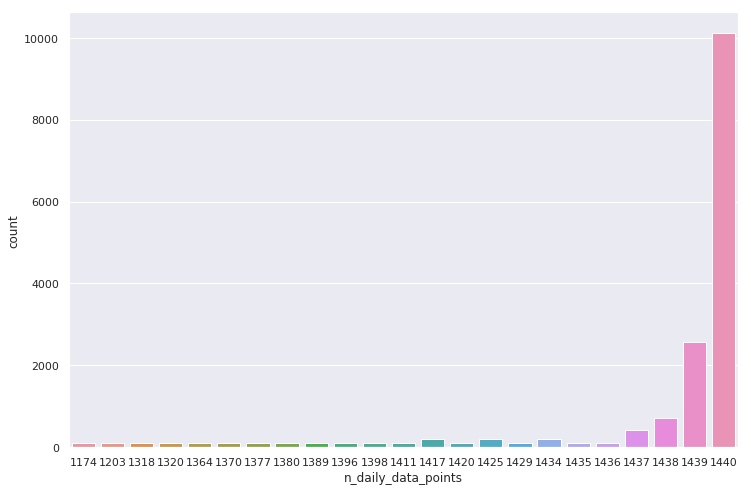

In [108]:
#daily data points box plot
sns.countplot(x = 'n_daily_data_points', data = auto)

Data point 1440 seems to have the highest traffic in the amount of blue cars followed by 1439 but the margins are huge. 

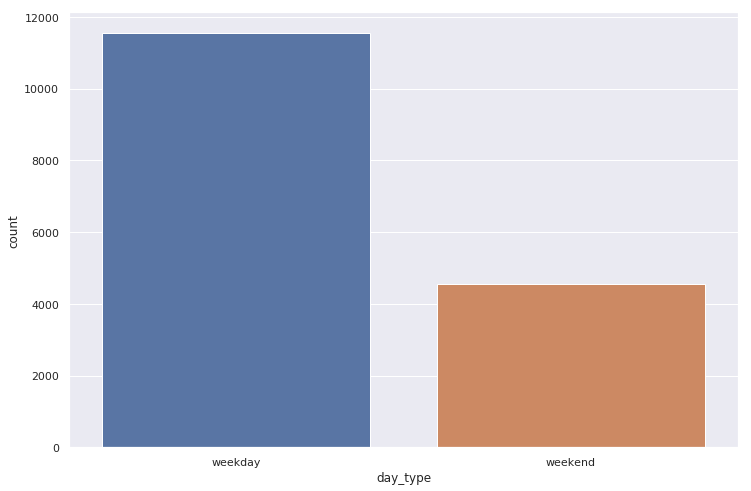

In [109]:
sns.countplot(x='day_type',data=auto)

Weekdays has more blue car usage of the various types compared to the weekend.

In [110]:
auto.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

Text(0.5, 1.0, 'Taken Utilib')

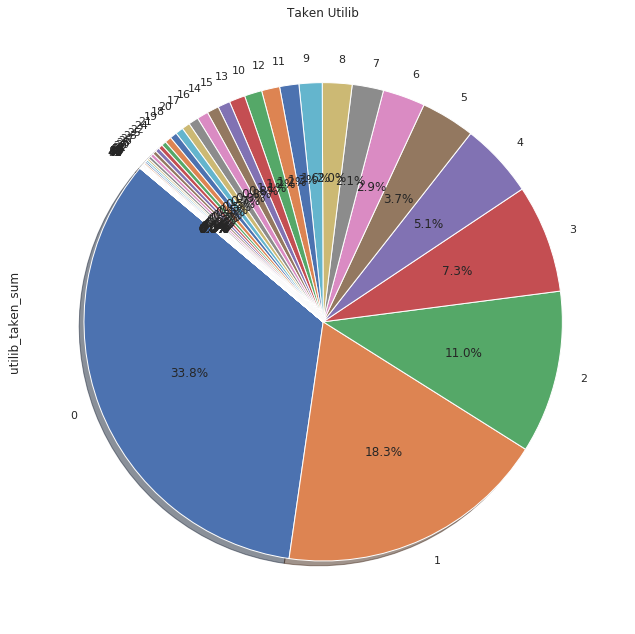

In [133]:
#pie chart to show the various relationship with the head of the family

auto.utilib_taken_sum.value_counts().plot.pie(autopct = '%1.1f%%',shadow = True, startangle = 140,figsize= (15,11))
plt.title('Taken Utilib')

Utilib had more cars taken at 33.8% on day 0, followed by 18.3% on day 1

Text(0.5, 1.0, 'Taken Utilib')

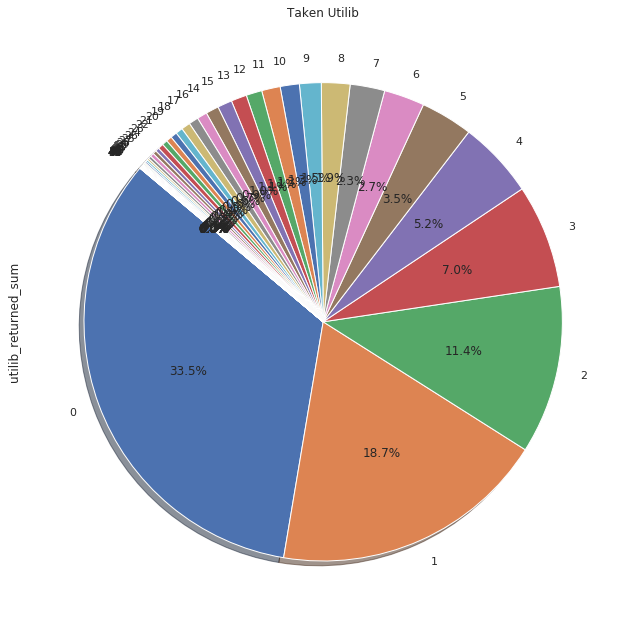

In [134]:
auto.utilib_returned_sum.value_counts().plot.pie(autopct = '%1.1f%%',shadow = True, startangle = 140,figsize= (15,11))
plt.title('Returned Utilib')

Still day 0 had the most utilib returned cars at 33.5% followed by 1 at 18.7%. This coincide with the utilib cars taken

In [135]:
#checking for existence outliers using kurtosis
auto.kurt()

#postal code and day of the week seem to have distribution less than 0 meaning the distribution is heavy tailed (Platykurtic)
#the rest of the variables have distribution more than 0 meaning their tails are thick)Leptokurtic

postal_code               -0.542143
n_daily_data_points       36.594846
dayofweek                 -1.260994
bluecars_taken_sum         6.172692
bluecars_returned_sum      6.186288
utilib_taken_sum           7.702362
utilib_returned_sum        7.936357
utilib_14_taken_sum        7.186815
utilib_14_returned_sum     7.185463
slots_freed_sum            6.454514
slots_taken_sum            6.442553
dtype: float64

In [136]:
#checking the skewness of the dataset
auto.skew()

#postal code and daily data points are skewed to the left . The rest of the variables are highly skewed positively.

postal_code              -1.168778
n_daily_data_points      -5.742776
dayofweek                 0.018824
bluecars_taken_sum        2.406355
bluecars_returned_sum     2.412085
utilib_taken_sum          2.556872
utilib_returned_sum       2.578665
utilib_14_taken_sum       2.510924
utilib_14_returned_sum    2.511488
slots_freed_sum           2.597406
slots_taken_sum           2.596904
dtype: float64

In [139]:
#checking the standard deviation in the data points
auto.std()

postal_code               7647.342000
n_daily_data_points         33.212050
dayofweek                    2.008378
bluecars_taken_sum         185.426579
bluecars_returned_sum      185.501535
utilib_taken_sum             5.815058
utilib_returned_sum          5.824634
utilib_14_taken_sum         12.870098
utilib_14_returned_sum      12.868993
slots_freed_sum             52.120263
slots_taken_sum             52.146030
dtype: float64

In [138]:
#checking for variance in the dataset
auto.var()
#the variance and standard deviation show dis-similarities meaning the data points are spread out over a wide range of values

postal_code               5.848184e+07
n_daily_data_points       1.103040e+03
dayofweek                 4.033582e+00
bluecars_taken_sum        3.438302e+04
bluecars_returned_sum     3.441082e+04
utilib_taken_sum          3.381490e+01
utilib_returned_sum       3.392636e+01
utilib_14_taken_sum       1.656394e+02
utilib_14_returned_sum    1.656110e+02
slots_freed_sum           2.716522e+03
slots_taken_sum           2.719208e+03
dtype: float64

# Bivariate Analysis

In [145]:
auto.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

           slots_taken_sum  slots_freed_sum
dayofweek                                  
0                     2374             2374
1                     2363             2363
2                     2268             2268
3                     2268             2268
4                     2271             2271
5                     2267             2267
6                     2274             2274


TypeError: ignored

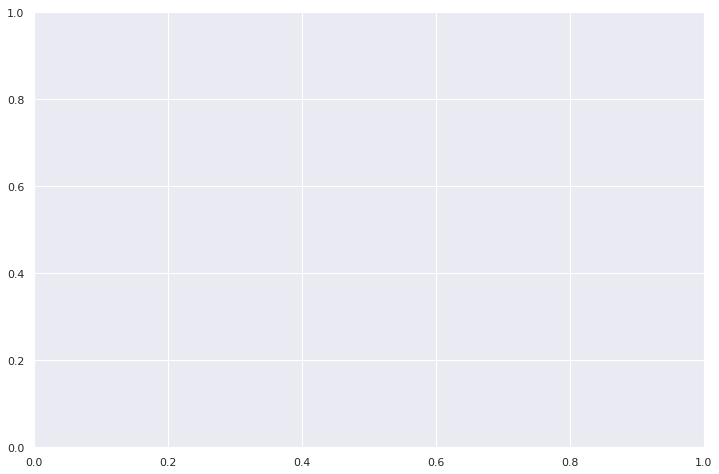

In [177]:
x = auto.groupby(['dayofweek'])['slots_taken_sum','slots_freed_sum'].count()
print(x)
#x = auto.groupby(['dayofweek','bluecars_taken_sum'])['dayofweek'].sum().sort_values( ascending=True)

#print(x)
#lifestyle.groupby([ 'country_code','health_status'])['health_status','id'].count().sort_values(by=['country_code','id'], ascending = False)


plt.bar(x, height = 8)
plt.axis('equal')
plt.title('day of week')
plt.show()

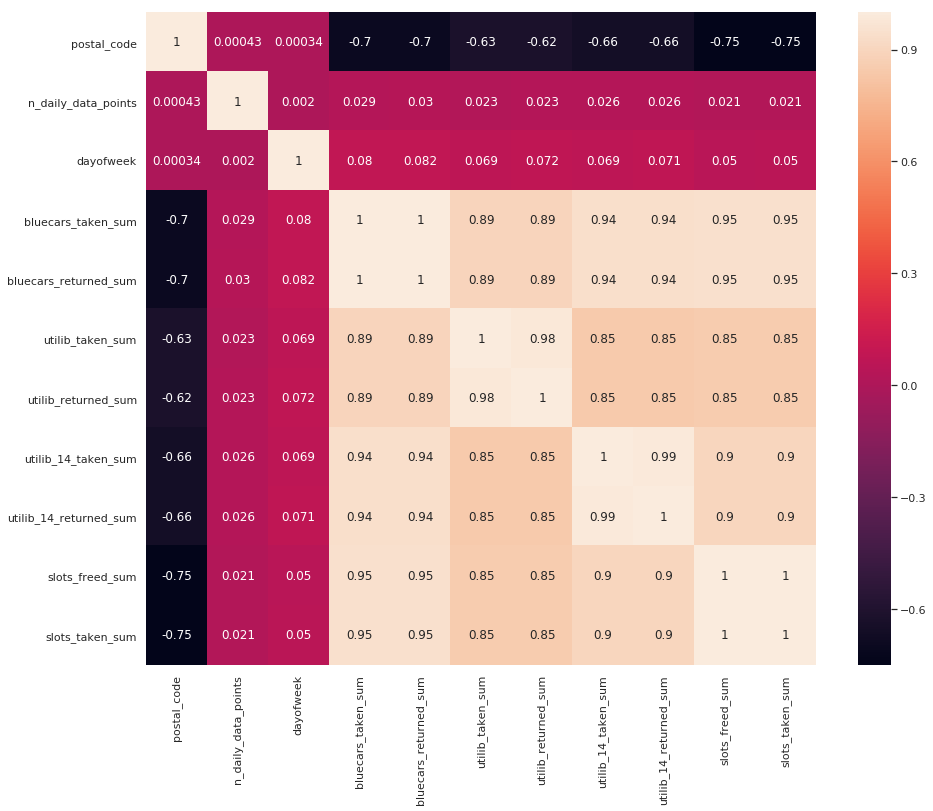

In [143]:
# Checking for correlation among the variables and ploting the summaries and recording our observations

f, ax = plt.subplots(figsize=(1,13))
corr = auto.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           annot = True)